In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


In [9]:
# =====================
# 1. Load dataset
# =====================
file_path = "team_11_ton-iot-engineered_train.txt"
df = pd.read_csv(file_path)

# Inspect
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (17, 15)


,Unnamed: 0,src_port,dst_port,proto,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,total_bytes,label
0,13,0.999864,0.000522,1.0,0.000000,0.0,0.0,0.00,0.0,0.25,0.277778,0.000000,0.000000,0.277778,1
1,2,0.552044,0.201995,1.0,0.000000,0.0,0.0,0.25,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0
2,17,1.000000,0.000522,1.0,0.000087,0.0,0.0,0.75,0.0,0.50,0.518519,0.333333,0.169492,0.518519,1
3,15,0.999932,0.000522,1.0,0.441837,0.0,0.0,0.75,0.0,0.75,0.759259,0.666667,0.338983,0.759259,1
4,8,0.999693,0.000522,1.0,0.443470,0.0,0.0,0.75,0.0,0.50,0.518519,0.666667,0.338983,0.518519,1


In [10]:
# =====================
# 2. Prepare features and labels
# =====================
X = df.drop(columns=["label"])   # features
y = df["label"]                  # target (0=normal, 1=attack)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, "Test set:", X_test.shape)


Training set: (13, 14) Test set: (4, 14)


In [11]:
# =====================
# 3. Train Models
# =====================

# Logistic Regression
log_reg = LogisticRegression(max_iter=500, class_weight="balanced")
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [12]:
# =====================
# 4. Evaluation
# =====================
models = {"Logistic Regression": log_reg, "Random Forest": rf, "XGBoost": xgb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("\n📌", name)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))



📌 Logistic Regression
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0
ROC-AUC  : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


📌 Random Forest
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0
ROC-AUC  : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


📌 XGBoost
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0
ROC-AUC  : 1.0

Classification Repo

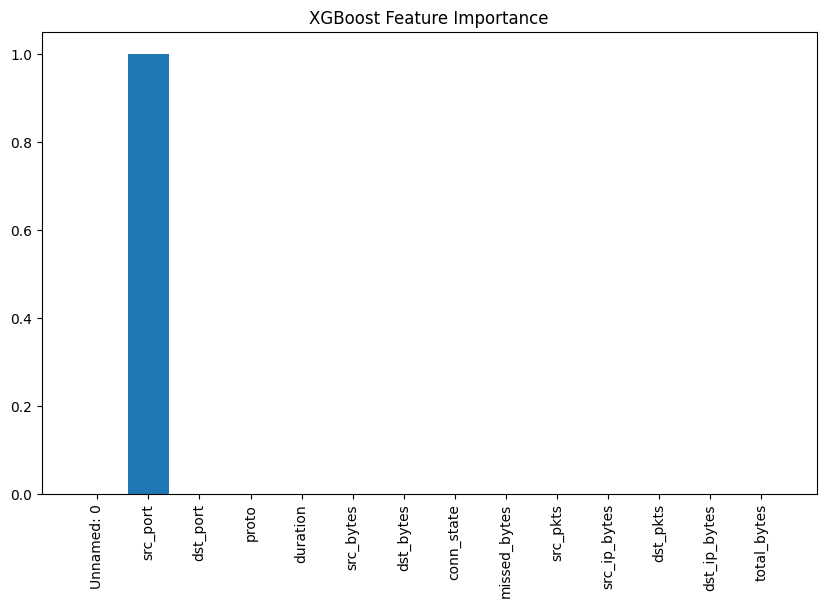

In [13]:
# =====================
# 5. Feature Importance (XGBoost)
# =====================
xgb_importance = xgb.feature_importances_

plt.figure(figsize=(10,6))
plt.bar(range(len(xgb_importance)), xgb_importance)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.title("XGBoost Feature Importance")
plt.show()
